In [1]:
import pandas as pd
import nltk
#nltk.download()
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
p_test = pd.read_csv('TrainSA.csv') p_test.SentimentText=p_test.SentimentText.astype(str)

In [24]:
# Import Data
vdata = pd.read_csv('Videos_data.csv')
vdata = vdata.iloc[:, 1:]     # Remove extra un-named column
vdata = vdata.iloc[:, 1:4]
vdata.head(10)


,Title,Description,Category
0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel
5,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
6,Welcome to Peru! | Best Essential Tips &amp; T...,Welcome to Peru! This essential travel guide w...,travel
7,How to Start a Travel Blog [2019] Travel Blogg...,Create a Travel Blog Website for Just $3.95 + ...,travel
8,A Day with KSRTC Bus Fans - Aanavandi Travel B...,ആനവണ്ടി ഭ്രാന്തൻമാരോടൊപ്പം കുമളിയിൽ ഒരു ദിവസം ...,travel
9,What is it like to travel in PAKISTAN?,Subscribe now: https://goo.gl/6zXZGK Watch the...,travel


In [30]:
vdata = vdata.astype(str)

In [31]:
# Change to lowercase
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())

# Remove numbers
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+', '', x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
vdata['Title']  = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
vdata['Description']  = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
vdata['Title'] = vdata['Title'].map(lambda x: x.strip())
vdata['Description'] = vdata['Description'].map(lambda x: x.strip())

# Tokenize into words
vdata['Title'] = vdata['Title'].map(lambda x: word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
vdata['Title'] = vdata['Title'].map(lambda x: [word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x: [w for w in x if not w in stop_words])
vdata['Description'] = vdata['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

In [32]:
# Missing Values
num_missing_desc = vdata.isnull().sum()[2]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
vdata = vdata.dropna()

Number of missing values: 0


# Data Preprocessing and cleaning

- Converting to Lowercase

- Removing numerical values and punctuation

- Removing extra white spaces

- Tokenizing into words

- Removing non-alphabetical words and stop words

- Lemmatization

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [18]:
def preprocessing(text):
    tokens = [word for sent in nltk.sent_tokenize(text)
              for word in nltk.word_tokenize(sent)]

    print( "- tokenize into words -" )
    print( tokens )
    print()
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]

    print( "- remove stopwords -" )
    print( tokens )
    print()
    
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    print( "- remove words less than three letters -" )
    print( tokens )
    print()
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]

    print( "- lower capitalization -" )
    print( tokens )
    print()
    
    # lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]

    print( "- lemmatization -" )
    print( tokens )
    print()

    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]

    print( "- lemmatization/verb -" )
    print( tokens )
    print()

    # stemming
    stemmer = PorterStemmer()
    tokens = [ stemmer.stem(word) for word in tokens ]

    print( "- stemming -" )
    print(tokens)
    print()
    
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

# Encode classes

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(vdata.Category)
vdata.Category = le.transform(vdata.Category)
vdata.head(10)

,Title,Description,Category
0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,5
1,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,5
2,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,5
3,goa travel diary four days goa travel outfit i...,hope enjoy goa travel diary video dont forget ...,5
4,step become travel blogger,travel blogger nikki vargas pin map project vo...,5
5,backpack meghalaya northeast india trip sohra ...,video explore north east india start guwahati ...,5
6,welcome peru best essential tip amp travel guide,welcome peru essential travel guide show best ...,5
7,start travel blog travel blogging fulltime,create travel blog website httpbitlyltstarttra...,5
8,day ksrtc bus fan aanavandi travel blog meet k...,ksrtc,5
9,like travel pakistan,subscribe httpsgooglzxzgk watch full series ht...,5


In [34]:
vdata.tail(5)

,Title,Description,Category
10328,watercolor scenery paint demo rainy day,watercolor scenery paint demo rainy day online...,0
10329,speed paint blackstone fortress urghuls,music midwinter minis enjoy series donate like,0
10330,fabric paint step step flower paint tutorial f...,love video please like share subscribe channel,0
10331,upside quotdell unveil paintingquot clip digit...,upside director neil burgers heartfelt comedy ...,0
10332,speed paint blackstone fortress negavolt cultists,thank penny step save day music midwinter mini...,0


In [46]:
vdata.iloc[:,0:3]

,Title,Description,Category
0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,5
1,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,5
2,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,5
3,goa travel diary four days goa travel outfit i...,hope enjoy goa travel diary video dont forget ...,5
4,step become travel blogger,travel blogger nikki vargas pin map project vo...,5
...,...,...,...
10328,watercolor scenery paint demo rainy day,watercolor scenery paint demo rainy day online...,0
10329,speed paint blackstone fortress urghuls,music midwinter minis enjoy series donate like,0
10330,fabric paint step step flower paint tutorial f...,love video please like share subscribe channel,0
10331,upside quotdell unveil paintingquot clip digit...,upside director neil burgers heartfelt comedy ...,0


# Vectorizing text features using TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = vdata.Category
features_title = tfidf_title.fit_transform(vdata.Title).toarray()
features_description = tfidf_desc.fit_transform(vdata.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (9999, 2637)
Description Features Shape: (9999, 4858)


# Data Analysis and Feature Exploration

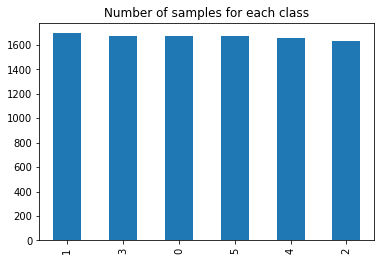

In [36]:
vdata['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', title='Number of samples for each class')

In [38]:
# Best 5 keywords for each class using Title Features
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. musical
. live
. travel
. arts
. video
. paint
. official
. music
. art
. theatre
Most correlated bigrams:
------------------------------
. art challenge
. avengers endgame
. theatre company
. theatre official
. theatre congolais
. capitol theatre
. musical theatre
. work theatre
. official music
. music video


# 'food':
Most correlated unigrams:
------------------------------
. street
. recipe
. taste
. healthy
. try
. foods
. eat
. snack
. cook
. food
Most correlated bigrams:
------------------------------
. cook guy
. sam cook
. try hiho
. eat snack
. emmy eat
. healthy snack
. snack amp
. taste test
. kid try
. street food


# 'history':
Most correlated unigrams:
------------------------------
. archaeologist
. rap
. anthropologist
. anthropological
. archaeologists
. discoveries
. archaeological
. archaeology
. history
. anthropology
Most correlated bigrams:
------------------------------
. cultural ant

In [39]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. spotify
. album
. draw
. listen
. arts
. official
. paint
. music
. art
. theatre
Most correlated bigrams:
------------------------------
. work theatre
. official video
. live capitol
. theatre passaic
. passaic nj
. capitol theatre
. click listen
. production connexion
. official music
. music video


# 'food':
Most correlated unigrams:
------------------------------
. delicious
. recipes
. taste
. healthy
. recipe
. foods
. eat
. snack
. cook
. food
Most correlated bigrams:
------------------------------
. httpbitlyznbqjw come
. httpbitlycomhihofans update
. sign httpbitlycomhihofans
. series httpbitlyznbqjw
. update hiho
. special offer
. hiho special
. come play
. sponsor series
. street food


# 'history':
Most correlated unigrams:
------------------------------
. rap
. anthropologist
. ancient
. archaeologist
. archaeologists
. discoveries
. archaeological
. history
. archaeology
. anthropology
Most co

# Modeling and Training

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier


In [58]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 0:2], vdata['Category'], random_state = 0)

In [59]:
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [60]:
X_train.head()

,Title,Description
3072,lec mit introduction computer science program ...,lecture goals course computation introduction ...
713,travel cargo ship philippines,travel cargo ship yes something many people th...
3598,store cat food vs homemade,patreon httpswwwpatreoncomjunskitchen thank wa...
1680,indian tourism travel goa hd,create video youtube video editor httpwwwyoutu...
819,travel hong kong,heres hong kong vlog stay overnight airport vi...


In [61]:
y_train.head()

3072    4
713     5
3598    1
1680    5
819     5
Name: Category, dtype: int32

In [62]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [66]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = vdata['Title'].values
descriptions = vdata['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(vdata['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 26134 unique tokens.
Shape of data tensor: (9999, 50)
Shape of label tensor: (9999, 6)


In [67]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

C:\Users\user\anaconda3\lib\site-packages\keras\layers\recurrent.py:2208: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 2,081,006
Trainable params: 2,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

C:\Users\user\anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\user\anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\user\anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not availab

Train on 6749 samples, validate on 750 samples
Epoch 1/5
6749/6749 [==============================] - 19s 3ms/step - loss: 1.1030 - accuracy: 0.6121 - val_loss: 0.2566 - val_accuracy: 0.9560
Epoch 2/5
6749/6749 [==============================] - 19s 3ms/step - loss: 0.1152 - accuracy: 0.9747 - val_loss: 0.0953 - val_accuracy: 0.9773
Epoch 3/5
6749/6749 [==============================] - 19s 3ms/step - loss: 0.0345 - accuracy: 0.9926 - val_loss: 0.0767 - val_accuracy: 0.9800
Epoch 4/5
6749/6749 [==============================] - 19s 3ms/step - loss: 0.0287 - accuracy: 0.9944 - val_loss: 0.1039 - val_accuracy: 0.9787
Epoch 5/5
6749/6749 [==============================] - 19s 3ms/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.0877 - val_accuracy: 0.9827


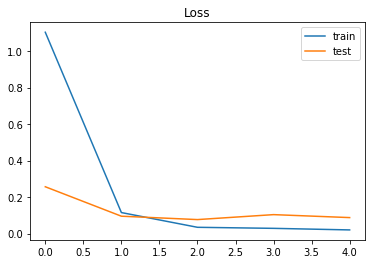

In [70]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

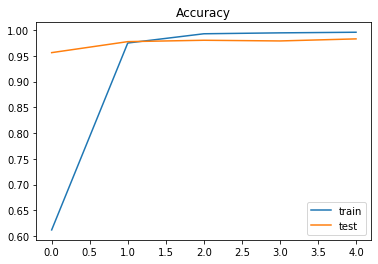

In [73]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Performance Evaluation

In [77]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 0:2], vdata['Category'], random_state = 0)

In [78]:
X_test

,Title,Description
9767,motema vue de loinmosekaherman fatoumayo esepe...,motema le nouveau theatre congolais de herman ...
920,animation show path asteroid travel wrong way ...,asteroid another star system find orbit wrong ...
2480,science technology ideas inquiry,curriculum community opportunity combine posit...
6091,hawai chappal manufacture business,contact website wwwsmartideashindicom disclaim...
2422,tv agh agh university science technology,agh university science technology one best ren...
...,...,...
9066,signal process art conservation lecture,signal process art conservation lecture geoffr...
4496,subscribers favorite junk food snack eat show,subscribers favorite junk food snack eat show
2107,primitive technology simplify blower furnace e...,blower description purpose project test simpli...
1139,fifa travel km tot,first many fifa tot pack open merch httpsshops...


In [79]:
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

                        precision    recall  f1-score   support

         art and music       0.92      0.95      0.94       415
                  food       0.97      0.95      0.96       449
               history       0.97      0.95      0.96       418
         manufacturing       0.95      0.99      0.97       398
science and technology       0.95      0.94      0.94       414
                travel       0.97      0.95      0.96       406

              accuracy                           0.96      2500
             macro avg       0.96      0.96      0.96      2500
          weighted avg       0.96      0.96      0.96      2500



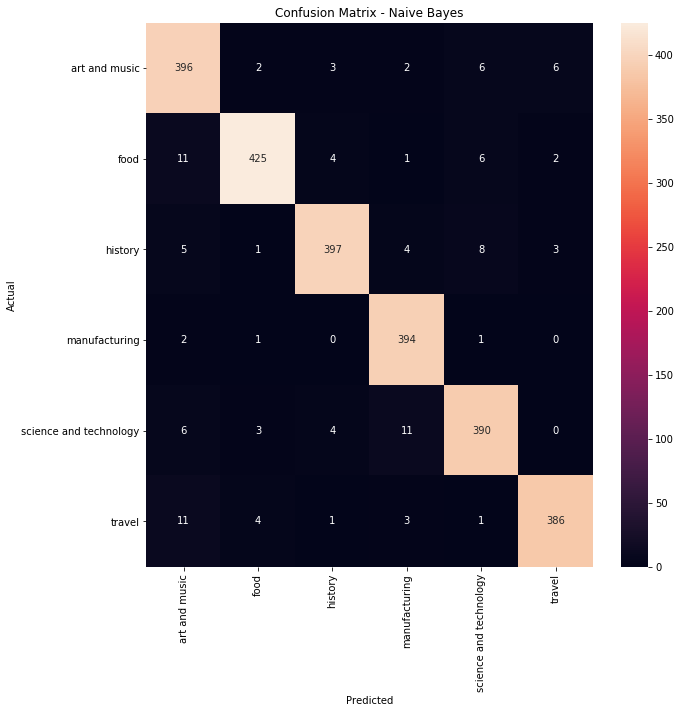

In [81]:
# Naive Bayes
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [87]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
'''
plot_precision_recall_curve(MultinomialNB, y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()
'''

# SVM

                        precision    recall  f1-score   support

         art and music       0.99      0.98      0.98       415
                  food       0.99      0.99      0.99       449
               history       0.96      0.99      0.97       418
         manufacturing       0.98      0.99      0.99       398
science and technology       0.99      0.96      0.97       414
                travel       0.99      0.99      0.99       406

              accuracy                           0.98      2500
             macro avg       0.98      0.98      0.98      2500
          weighted avg       0.98      0.98      0.98      2500



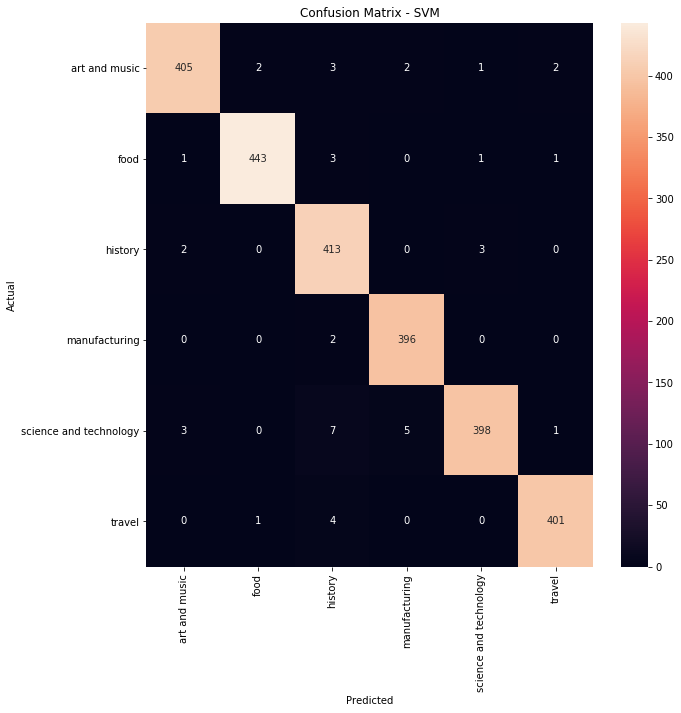

In [96]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
'''
skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()
'''

# Adaboost

                        precision    recall  f1-score   support

         art and music       0.99      0.85      0.91       415
                  food       0.99      0.90      0.94       449
               history       0.91      0.75      0.82       418
         manufacturing       1.00      0.82      0.90       398
science and technology       0.58      0.98      0.72       414
                travel       0.99      0.89      0.94       406

              accuracy                           0.86      2500
             macro avg       0.91      0.86      0.87      2500
          weighted avg       0.91      0.86      0.87      2500



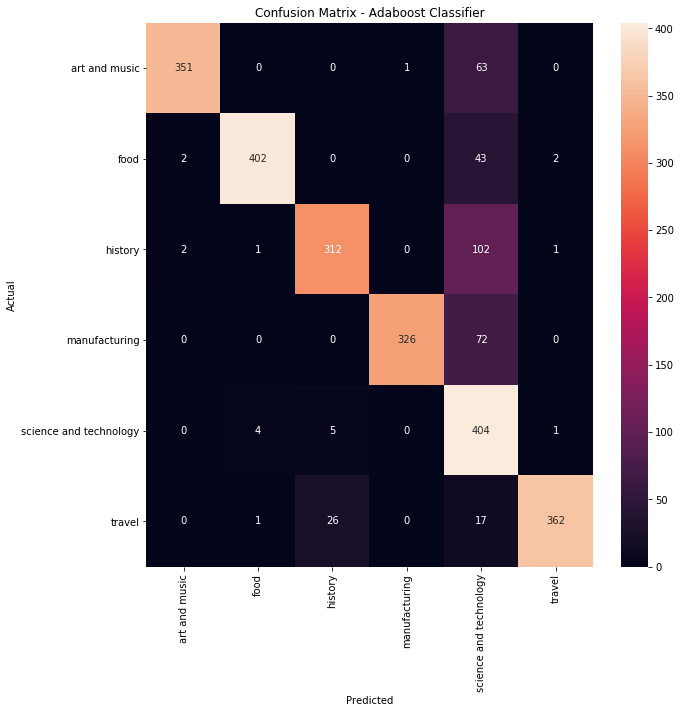

In [97]:
# Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

# LSTM

C:\Users\user\anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"


                        precision    recall  f1-score   support

         art and music       0.96      0.97      0.96       403
                  food       0.98      0.96      0.97       438
               history       0.97      0.97      0.97       421
         manufacturing       0.98      0.97      0.98       397
science and technology       0.96      0.98      0.97       403
                travel       0.97      0.98      0.98       438

              accuracy                           0.97      2500
             macro avg       0.97      0.97      0.97      2500
          weighted avg       0.97      0.97      0.97      2500



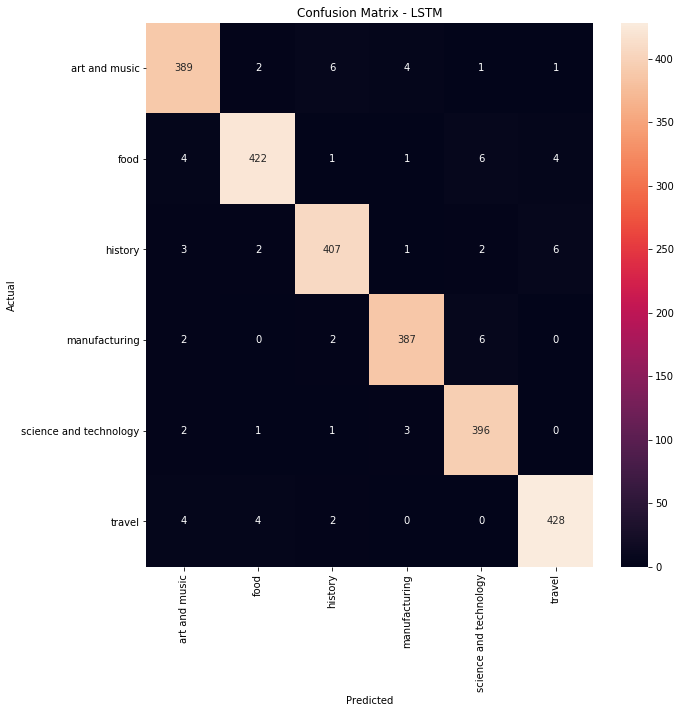

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()


In [ ]:
'''
skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()
'''

# Importing Advertisement Dataset

Advertisement data is collected via web scrapping. The Data iscollected from www.adforum.com Using brower extention and and the extractor tool Screaming Frog SEO spyder

In [101]:
#import data
adata = pd.read_csv('collected_sports_data.csv' )

In [102]:
adata.head()

,Original Url,Title 1,Meta Description 1,H1-1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,https://www.adforum.com/creative-work/ad/playe...,"Leos - ""Inner Beauty""","Television Inner Beauty for Leos by Xynias, We...","Leos - ""Inner Beauty""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.adforum.com/creative-work/ad/playe...,"Ninemsn - ""Indian Restaurant""",Television Indian Restaurant for Ninemsn by Ha...,"Ninemsn - ""Indian Restaurant""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.adforum.com/creative-work/ad/playe...,"Social Democratic Party - ""Social-Democratic P...",Television Social-Democratic Party for Social ...,"Social Democratic Party - ""Social-Democratic P...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.adforum.com/creative-work/ad/playe...,"The Observer - ""Sport The 1st""",Television Sport The 1st for The Observer by O...,"The Observer - ""Sport The 1st""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.adforum.com/creative-work/ad/playe...,"Wind - ""History Has Changed""",Television History Has Changed for Wind by TBW...,"Wind - ""History Has Changed""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#delete columns which are not required
adata.drop(adata.iloc[:, 4:42], inplace = True, axis = 1)

In [104]:
adata.head(10)

,Original Url,Title 1,Meta Description 1,H1-1
0,https://www.adforum.com/creative-work/ad/playe...,"Leos - ""Inner Beauty""","Television Inner Beauty for Leos by Xynias, We...","Leos - ""Inner Beauty"""
1,https://www.adforum.com/creative-work/ad/playe...,"Ninemsn - ""Indian Restaurant""",Television Indian Restaurant for Ninemsn by Ha...,"Ninemsn - ""Indian Restaurant"""
2,https://www.adforum.com/creative-work/ad/playe...,"Social Democratic Party - ""Social-Democratic P...",Television Social-Democratic Party for Social ...,"Social Democratic Party - ""Social-Democratic P..."
3,https://www.adforum.com/creative-work/ad/playe...,"The Observer - ""Sport The 1st""",Television Sport The 1st for The Observer by O...,"The Observer - ""Sport The 1st"""
4,https://www.adforum.com/creative-work/ad/playe...,"Wind - ""History Has Changed""",Television History Has Changed for Wind by TBW...,"Wind - ""History Has Changed"""
5,https://www.adforum.com/creative-work/ad/playe...,"Nestlé - ""Swimming""",Television Swimming for Nestlé by Publicis Ita...,"Nestlé - ""Swimming"""
6,https://www.adforum.com/creative-work/ad/playe...,"Nestlé - ""Sprint""",Television Sprint for Nestlé by Publicis Italy...,"Nestlé - ""Sprint"""
7,https://www.adforum.com/creative-work/ad/playe...,"Nestlé - ""Volley""",Television Volley for Nestlé by Publicis Italy...,"Nestlé - ""Volley"""
8,https://www.adforum.com/creative-work/ad/playe...,"Hertz - ""Tennis""",Television Tennis for Hertz by Publicis Mojo,"Hertz - ""Tennis"""
9,https://www.adforum.com/creative-work/ad/playe...,"""Natural High""",Television Natural High for by McCann Brisbane,"""Natural High"""


# Data Prepocessing and cleaning


In [105]:
# Change to lowercase
adata['Title 1'] = adata['Title 1'].map(lambda x: x.lower())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.lower())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.lower())

# Remove Punctuation
adata['Title 1'] = adata['Title 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['H1-1'] = adata['H1-1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
adata['Title 1'] = adata['Title 1'].map(lambda x: x.strip())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.strip())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.strip())

In [106]:
adata.head(10)

,Original Url,Title 1,Meta Description 1,H1-1
0,https://www.adforum.com/creative-work/ad/playe...,leos inner beauty,television inner beauty for leos by xynias wet...,leos inner beauty
1,https://www.adforum.com/creative-work/ad/playe...,ninemsn indian restaurant,television indian restaurant for ninemsn by ha...,ninemsn indian restaurant
2,https://www.adforum.com/creative-work/ad/playe...,social democratic party socialdemocratic party,television socialdemocratic party for social d...,social democratic party socialdemocratic party
3,https://www.adforum.com/creative-work/ad/playe...,the observer sport the 1st,television sport the 1st for the observer by o...,the observer sport the 1st
4,https://www.adforum.com/creative-work/ad/playe...,wind history has changed,television history has changed for wind by tbw...,wind history has changed
5,https://www.adforum.com/creative-work/ad/playe...,nestlé swimming,television swimming for nestlé by publicis ita...,nestlé swimming
6,https://www.adforum.com/creative-work/ad/playe...,nestlé sprint,television sprint for nestlé by publicis italy...,nestlé sprint
7,https://www.adforum.com/creative-work/ad/playe...,nestlé volley,television volley for nestlé by publicis italy...,nestlé volley
8,https://www.adforum.com/creative-work/ad/playe...,hertz tennis,television tennis for hertz by publicis mojo,hertz tennis
9,https://www.adforum.com/creative-work/ad/playe...,natural high,television natural high for by mccann brisbane,natural high


# Conclusion:

The proposed system extracts features from videos like title, description, and hashtags based on 

these extracted features we intend to produce classification labels with the use of 

classification models. Analyzing produced labels concerning advertisement datasets we intend to 

provide advertisements on the video related to the topic of the video.

# Further improvements:
As we can’t say surely that the metadata we extracted from the video is correct. And also we 

cannot find description or titles of some videos correct to what shown in the video. In this 

situation, our system fails to show the related advertisement(s).

We can overcome this drawback by extracting the features from the actual video, like text, 

motion, etc. And use these features to identify the content of the video. I will post this 

tutorial soon.
